In [5]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [6]:
np.expand_dims

<function numpy.expand_dims(a, axis)>

In [7]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv','train.csv'))

In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df.tail()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [17]:
df.iloc[19]['comment_text']

"Don't mean to bother you \n\nI see that you're writing something regarding removing anything posted here and if you do oh well but if not and you can acctually discuss this with me then even better.\n\nI'd like to ask you to take a closer look at the Premature wrestling deaths catagory and the men listed in it, surely these men belong together in some catagory. Is there anything that you think we can do with the catagory besides delting it?"

In [16]:
df[df.columns[2:]].iloc[19]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 19, dtype: int64

1.Preprocessing:
tokenisation- each word maps to a number such that only deep learning model understands.

In [18]:
from tensorflow.keras.layers import TextVectorization

In [24]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [29]:
MAX_WORDS = 200000 #number of words in vocabulary

In [30]:
vectorizer = TextVectorization(max_tokens=MAX_WORDS,output_sequence_length=1800,output_mode='int')

In [32]:
type(X)

pandas.core.series.Series

In [34]:
vectorizer.adapt(X.values)

In [36]:
type(X.values)

numpy.ndarray

In [38]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [43]:
vectorized_text = vectorizer(X.values)

In [44]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [46]:
#MCSHBAP - map, cache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps prevent bottlenecks

In [48]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [50]:
int(len(dataset)*.7)

6981

In [51]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [52]:
train_generator = train.as_numpy_iterator()

In [56]:
train_generator.next()

(array([[   55,   276,    38, ...,     0,     0,     0],
        [  920,     8,    19, ...,     0,     0,     0],
        [17915,   683, 10120, ...,     0,     0,     0],
        ...,
        [  124,     7,    13, ...,     0,     0,     0],
        [    7,    20,    30, ...,     0,     0,     0],
        [  901,   865,   655, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0]]))

2.Building the model: 1st layer-embedding layer(knows in depth, analogy=personality of a word.)

CREATING SEQUENTIAL MODEL

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [58]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_WORDS+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [59]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam') #we can have different values at different features

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [62]:
history = model.fit(train, epochs=3, validation_data=val)

Epoch 1/3


6981/6981 [==============================] - 3161s 453ms/step - loss: 0.0598 - val_loss: 0.0469
Epoch 2/3
6981/6981 [==============================] - 3148s 451ms/step - loss: 0.0459 - val_loss: 0.0401
Epoch 3/3
6981/6981 [==============================] - 4234s 606ms/step - loss: 0.0405 - val_loss: 0.0372


In [64]:
history.history

{'loss': [0.05977574363350868, 0.04587925598025322, 0.04045076295733452],
 'val_loss': [0.046923574060201645, 0.040113188326358795, 0.03723917528986931]}

In [65]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

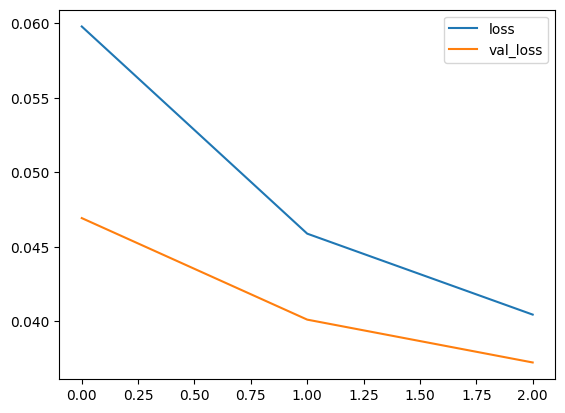

In [66]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

3.MAKE PREDICTIONS
Get text and work it through the vectorizer.

In [71]:
input_text = vectorizer('You freaking suck! I will kill you')

In [70]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [72]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0])>

In [73]:
model.predict(np.array([input_text]))

1/1 [==============================] - 0s 58ms/step


array([[0.99937606, 0.35894597, 0.9305974 , 0.08604151, 0.94540215,
        0.30483118]], dtype=float32)

Multiple comments passed together(batch)

In [74]:
batch = test.as_numpy_iterator().next()

In [75]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [79]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [78]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 88ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

4.EVALUATING MODEL
Binary classification metrics

In [80]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [82]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [83]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 71ms/step


In [87]:
print("Precision:",pre.result().numpy())
print("Recall:",re.result().numpy())
print("Accuracy:", acc.result().numpy())

Precision: 0.81405437
Recall: 0.7981287
Accuracy: 0.51153463


5. Test

In [90]:
model.save('toxicity.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Use this command if you're running this model out of jupyter notebook
model = tf.keras.models.load_model('toxicity.h5')

In [100]:
input_str = vectorizer('i hate you! i will burn you')

In [101]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 59ms/step


In [102]:
res>0.5

array([[ True, False, False, False,  True, False]])